<a href="https://colab.research.google.com/github/himalachudel/FDSFE_HAcharya/blob/main/Classroomcodings/ANN11_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
import matplotlib as plt
%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# 0.1 reading data from kaggle

In [ ]:
pip install kaggle

In [ ]:
!kaggle --version

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


## create a file kaggle.json by requesting and API key to kaggle (under account)
## https://www.kaggle.com/docs/api
## and upload it to your google drive.
## Upload and read in the credential, store them as environmental variables

### Before class
Please register for an account at kaggle.com, all the work we will do together in class as well as your next homework will require it.
To register do the following:
- go to kaggle.com
- click on “Register” in the upper right corner
select either Register with Google, or Register with your email (it’s up to you)
- follow the instructions provided by kaggle to create an account (enter your email address, create a password, and choose a username), all of which are up to you, this will be your account after all
- Make sure that at the end, you have an account that you can log in with, and be logged in and ready next class

### In class

- Go to https://www.kaggle.com/ and sign in
- click on the icon of your avatar on the top right
- select account from the drop menu
- scroll down to API and click `create New API Token`. This will download a json file on your computer
- open google drive at https://drive.google.com/drive/u/0/my-drive in your browser
-  upload the kaggle.json file from your laptop to the drive


In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
cd drive/My\ Drive/

/content/drive/My Drive


make sure the file is there: this cell should return "kaggle.json"

In [ ]:
ls /content/drive/MyDrive/Kaggle/kaggle.json

/content/drive/MyDrive/Kaggle/kaggle.json


the next cell changes who can access this file. Tokens are a seriously private thing! they are used to access sites. If someone were to hack the kaggle site and steal information from the user using your token you would be legally responsible for that! So keep your files secret. Don't share them with any one, don't print the content of the json file we use in your notebook.

In [ ]:
!chmod 600 /content/drive/MyDrive/Kaggle/kaggle.json

In [ ]:
envs = json.load(open("/content/drive/MyDrive/Kaggle/kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = "66dc6d2c4836d577f6821d5cc8376456"#envs['key']

In [ ]:
#check that it worked by listing the kaggle datasets
!kaggle competitions list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 70, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 713, in competitions_list_cli
    competitions = self.competitions_list(group=group,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 693, in competitions_list
    return [Competition(c) for c in competitions_list_result]
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 693, in <listcomp>
    return [Competition(c) for c in competitions_list_result]
  File "/usr/local/lib/python3.10/dist-packages/kaggle/models/kaggle_models_extended.py", line 42, in __init__
    parsed_dict = {k: parse(v) for k, v in init_dict.items()}
AttributeError: 'str' object has no attribute 'items'


create a directory for these data


In [ ]:
!mkdir kaggleTitanic

mkdir: cannot create directory ‘kaggleTitanic’: File exists


move to that directory


In [ ]:
cd kaggleTitanic

/content/drive/MyDrive/kaggleTitanic


download the titanic data into the directory you created for it

In [ ]:
!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 70, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 997, in competition_download_cli
    self.competition_download_files(competition, path, force,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 960, in competition_download_files
    url = response.retries.history[0].redirect_location.split('?')[0]
IndexError: tuple index out of range


In [ ]:
!ls

gender_submission.csv  test.csv  TitanicTree  TitanicTree.pdf  titanic.zip  train.csv


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

read in the data

In [ ]:
titanic = pd.read_csv("train.csv")

In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 0.2 data cleaning and wrangling

### turn gender into numeric

In [ ]:
titanic["gender"] = titanic.Sex.map({'male':0, 'female':1})

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [ ]:
titanic["Embarked"] = titanic.Embarked.map({'S':0, 'C':1,'Q':2})

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0.0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0.0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1.0,0


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
 12  gender       891 non-null    int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 90.6+ KB


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'gender'],
      dtype='object')

In [ ]:
titanic_clean=titanic[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'gender']].dropna()
titanic_clean.shape

(712, 8)

In [ ]:
from sklearn.preprocessing import scale
titanic_scaled=scale(titanic_clean.iloc[:,1:])
titanic_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [ ]:
x=titanic_scaled
y=titanic_clean["Survived"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=302,test_size=0.2)

In [ ]:
y_train.shape,y_test.shape

((569,), (143,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model=Sequential()
model.add(Dense(12,input_shape=(7,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

NameError: ignored

In [6]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[])

NameError: ignored

In [5]:
history=model.fit(x_train,y_train,epochs=150,batch_size=10)

NameError: ignored

In [4]:
history.history

NameError: ignored

In [3]:
plt.plot(history.history["loss"])
plt.xlabe("training epoch")
plt.ylabel("accuracy")

NameError: ignored

In [ ]:
model.predict(x_test)

5/5 [==============================] - 0s 10ms/step


array([[9.89026070e-01],
       [9.95360538e-02],
       [8.66372526e-01],
       [1.71236992e-01],
       [4.06804144e-01],
       [5.89961767e-01],
       [9.88999784e-01],
       [1.94089431e-02],
       [7.27853999e-02],
       [8.48267496e-01],
       [2.60536313e-01],
       [9.91079748e-01],
       [9.90005732e-01],
       [1.13687336e-01],
       [9.93395984e-01],
       [1.32175967e-01],
       [1.07165910e-01],
       [6.53792024e-01],
       [9.08038616e-01],
       [8.97831619e-01],
       [8.96792114e-01],
       [2.41915911e-01],
       [5.71761072e-01],
       [2.80274935e-02],
       [1.50364161e-01],
       [1.23946287e-01],
       [9.73415375e-01],
       [5.48796713e-01],
       [9.97962415e-01],
       [5.83207048e-02],
       [7.11593330e-01],
       [7.57080555e-01],
       [6.40630484e-01],
       [6.71254918e-02],
       [1.75635740e-02],
       [5.21910548e-01],
       [8.98981154e-01],
       [8.82638991e-01],
       [2.42856100e-01],
       [2.05809250e-01],


### throw away data that you will not use

In [ ]:
titanic_short1= titanic.drop(columns=["PassengerId","SibSp","Parch","Ticket","Fare","Cabin","Embarked","Name","Sex","Survived"])

In [ ]:
titanic_short1

,Pclass,Age,gender
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0
...,...,...,...
885,3,39.0,1
886,2,27.0,0
887,1,19.0,1
889,1,26.0,0


In [ ]:
new_order=['Pclass','gender', 'Age']

In [ ]:
titanic_short=titanic_short1[new_order]

In [ ]:
titanic_short.values

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       ...,
       [ 1.,  1., 19.],
       [ 1.,  0., 26.],
       [ 3.,  0., 32.]])

In [ ]:
titanic_short

,Pclass,gender,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


# IDEALLY GET TO HERE IN CLASS TOGETHER - the rest can just be left in the notebook for the students to inspect. Its the by-hand flow chart I made for the slides

# 0.3 test the purity of various splits
## first split

### split by gender

In [ ]:
print ("Survived fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.gender.values == 0).sum(),
     ((titanic_short.gender.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.gender.values == 1).sum()))

Survived fraction
 M     F 
 0.21 0.75


In [ ]:
print ("Died fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 0)).sum() * 1.0 /
       (titanic_short.gender.values == 0).sum(),
       ((titanic_short.gender.values == 1) & (titanic.Survived.values == 0)).sum() * 1.0 /
      (titanic_short.gender.values == 1).sum()))

Died fraction
 M     F 
 0.79 0.25


### split by age (at 6.5)

In [ ]:
print ("Survived fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Age.values <=6.5).sum()))

Survived fraction
 >6.5  <6.5 
 0.39  0.70


In [ ]:
print ("Died fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 0)).sum() * 1.0 /
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 0)).sum() * 1.0 /
       (titanic_short.Age.values <=6.5).sum()))

Died fraction
 >6.5  <6.5 
 0.61  0.30


### split by travel class

In [ ]:
print ("Survived fraction\n 1st   2nd \n {0:.2f}  {1:.2f}".format
     (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 1).sum(),
       ((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 2).sum()))

Survived fraction
 1st   2nd 
 0.66  0.48


In [ ]:
print ("Survived fraction\n 2nd   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Pclass.values == 2).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 2nd   3rd 
 0.48  0.24


In [ ]:
print ("Survived fraction\n 1st   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Pclass.values == 1).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 1st   3rd 
 0.66  0.24


In [ ]:
print ("Survived fraction\n 1st   2nd or 3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Pclass.values == 1).sum(),
        (((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 2)) & (titanic.Survived.values == 1)).sum() * 1.0 /
      ((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 3)).sum()))

Survived fraction
 1st   2nd or 3rd 
 0.66  0.47


# The purest split is by gender, so that is chosen as the first node

# second split

### by travel class

In [ ]:
print ("Survived fraction of females: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
       (((titanic_short.gender.values == 1) &
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & (titanic_short.Pclass.values == 1)).sum(),
        ((titanic_short.gender.values == 1) &
        ~(titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & ~(titanic_short.Pclass.values == 1)).sum()))

Survived fraction of females: 
 1st   2nd,3rd
 0.96  0.65


In [ ]:
print ("Survived fraction of males: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
        (((titanic_short.gender.values == 0) &
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (titanic_short.Pclass.values == 1)).sum(),
        ((titanic_short.gender.values == 0) &
        (~(titanic_short.Pclass.values == 1)) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (~(titanic_short.Pclass.values == 1))).sum() ))

Survived fraction of males: 
 1st   2nd,3rd
 0.40  0.15


### by age

In [ ]:
print ("Survived fraction of females: \n <6.5  >=6.5   \n {0:.2f} {1:.2f}".format
        (((titanic_short.gender.values == 1) &
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values < 6.5)).sum(),

       ((titanic_short.gender.values == 1) &
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of females: 
 <6.5  >=6.5   
 0.74 0.76


In [ ]:
print ("Survived fraction of males: \n <6.5 >=6.5   \n {0:.2f}  {1:.2f}".format
     (((titanic_short.gender.values == 0) &
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values < 6.5)).sum(),
     ((titanic_short.gender.values == 0) &
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of males: 
 <6.5 >=6.5   
 0.67  0.18


## The purest split is
## - for females by travel class
## - for males by age

# 0.4 actually run a tree model

Below I run a tree model, a simple Decision tree. Check out the syntax of the call and the hyperparameters. Next you will run tree ensamble models by yourself for the homework, but the syntax is generally the same

In [ ]:
from sklearn import tree
clf =  tree.DecisionTreeClassifier(max_depth=3, criterion="gini",
                        random_state=222).fit(titanic_short.values,
                                              titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.8081232492997199

# 0.5 create the dendrogram viz

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, feature_names=titanic_short.columns,
                                out_file=None)
graph = graphviz.Source(dot_data)

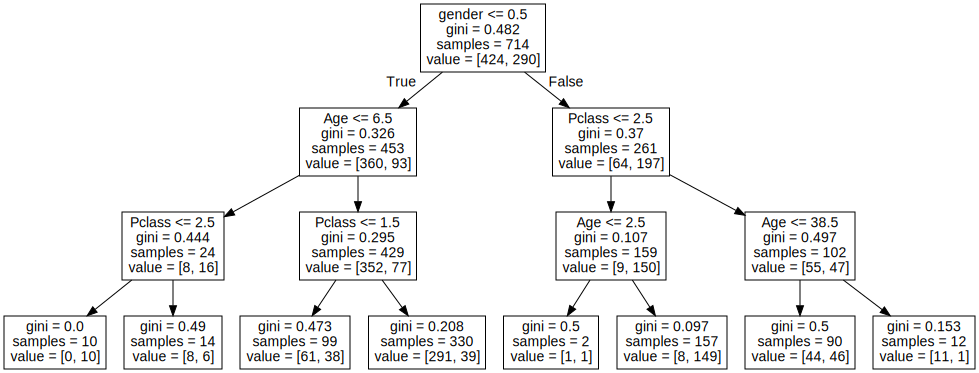

In [ ]:
graph

In [ ]:
graph.render("TitanicTree")

'TitanicTree.pdf'

## THIS IS WHERE THE HOMEWORK YOU DO BY YOURSELF STARTS

# 1 run ensamble method:
## changing model to Random Forest

In [ ]:
titanic_short

,Pclass,gender,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


# 1. Split the data into a training and a test set

In [ ]:
from sklearn.model_selection import train_test_split
X = titanic_short.values
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[ 3.,  1., 31.],
        [ 3.,  0., 26.],
        [ 3.,  0., 30.],
        ...,
        [ 1.,  1., 41.],
        [ 3.,  0., 33.],
        [ 3.,  0., 33.]]),
 array([[ 2. ,  0. , 42. ],
        [ 2. ,  0. ,  3. ],
        [ 2. ,  1. , 29. ],
        [ 1. ,  1. , 24. ],
        [ 3. ,  0. , 43. ],
        [ 2. ,  0. ,  8. ],
        [ 3. ,  1. , 33. ],
        [ 2. ,  1. , 54. ],
        [ 3. ,  1. , 28. ],
        [ 3. ,  1. , 23. ],
        [ 1. ,  1. , 17. ],
        [ 2. ,  1. , 32.5],
        [ 1. ,  0. , 31. ],
        [ 3. ,  0. , 38. ],
        [ 1. ,  1. , 35. ],
        [ 2. ,  0. , 23. ],
        [ 3. ,  0. , 23.5],
        [ 1. ,  1. , 16. ],
        [ 2. ,  0. , 27. ],
        [ 1. ,  1. , 54. ],
        [ 3. ,  1. , 16. ],
        [ 2. ,  1. , 50. ],
        [ 3. ,  1. ,  9. ],
        [ 1. ,  0. , 35. ],
        [ 3. ,  0. , 22. ],
        [ 3. ,  0. , 17. ],
        [ 3. ,  0. , 16. ],
        [ 3. ,  0. , 26. ],
        [ 3. ,  1. , 14.5],
        [ 3. ,  0. , 38

##Calculating train and test score

In [ ]:
from sklearn import ensemble
rf =  ensemble.RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8).fit(X_train, y_train)
print ("train score %.2f"%rf.score(X_train, y_train),
       "test score %.2f"%rf.score(X_test, y_test))

train score 0.89 test score 0.78


In [ ]:
rf.feature_importances_

array([0.17054051, 0.37801663, 0.45144285])

## change the hyper parameters and check the train and test score

changing max depth and check the score of the model

In [ ]:
rf =  ensemble.RandomForestClassifier(n_estimators=100, random_state=42, max_depth=6).fit(X_train, y_train)
print ("train score %.2f"%rf.score(X_train, y_train),
       "test score %.2f"%rf.score(X_test, y_test))

train score 0.88 test score 0.78


In [ ]:
rf.feature_importances_

array([0.17054051, 0.37801663, 0.45144285])

try another max depth and check the score of the model

In [ ]:
rf =  ensemble.RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10).fit(X_train, y_train)
print ("train score %.2f"%rf.score(X_train, y_train),
       "test score %.2f"%rf.score(X_test, y_test))


train score 0.91 test score 0.76


**Which model is better? why? what would you report as your model accuracy?**



Among three different max_depths, the train score was higher for the highest max_depth (i.e,10) and the lowest for the lowest max_depth (i.e,6). Regarding the test score it didnt change on decreasing max_depth to 6 from 8 but decreased on incresing to 10 from 6. The optimum values was returned for max_depth 8. Thus that is teh better model among three.

## changing model: do the same with the Gradient Boosted Trees

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=42).fit(X_train, y_train)
print("train score %.2f"%clf.score(X_train, y_train),
"test score %.2f"%clf.score(X_test, y_test))

train score 0.91 test score 0.75


changing max depth and check the score of the model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42).fit(X_train, y_train)
print("train score %.2f"%clf.score(X_train, y_train),
"test score %.2f"%clf.score(X_test, y_test))

train score 0.91 test score 0.75


try another max depth and check the score of the model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42).fit(X_train, y_train)
print("train score %.2f"%clf.score(X_train, y_train),
"test score %2f"%clf.score(X_test, y_test))

train score 0.91 test score 0.755245


**Changing max_depth didnt cause much change in train score and test score.**

# 2 feature importance

**Feature importance for Random forest**

In [ ]:
rf.feature_importances_

array([0.17054051, 0.37801663, 0.45144285])

**Age has the highest influence (~ 46 %) among 3**

**Feature importance for gradient boosted trees**

In [ ]:
clf.feature_importances_

array([0.18200226, 0.43372433, 0.38427342])

**Gender has the highest influence (~ 44 %) among 3**